In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_p = pd.read_csv('population.csv')
df_p

,Continent,Country,Year,Population,Yearly%Change,YearlyChange,MedianAge,UrbanPopulation
0,Asia,Afghanistan,1955,8270991,1.30,103775,19.2,587818
1,Asia,Afghanistan,1960,8996973,1.70,145196,18.8,755797
2,Asia,Afghanistan,1965,9956320,2.05,191869,18.4,984350
3,Asia,Afghanistan,1970,11173642,2.33,243464,17.9,1295433
4,Asia,Afghanistan,1975,12689160,2.58,303104,17.3,1717422
...,...,...,...,...,...,...,...,...
4225,Africa,Zimbabwe,2016,14030331,1.56,215702,18.5,5215894
4226,Africa,Zimbabwe,2017,14236595,1.47,206264,18.5,5328766
4227,Africa,Zimbabwe,2018,14438802,1.42,202207,18.5,5447513
4228,Africa,Zimbabwe,2019,14645468,1.43,206666,18.5,5571525


In [2]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Continent        4230 non-null   object 
 1   Country          4230 non-null   object 
 2   Year             4230 non-null   int64  
 3   Population       4230 non-null   int64  
 4   Yearly%Change    4230 non-null   float64
 5   YearlyChange     4230 non-null   int64  
 6   MedianAge        4230 non-null   float64
 7   UrbanPopulation  4230 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 264.5+ KB


In [3]:
df_p['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'North America'], dtype=object)

C:\Users\sakif\AppData\Local\Temp\ipykernel_19904\1641537264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Continent_population'] = new_df['YearlyChange'].sum()
C:\Users\sakif\AppData\Local\Temp\ipykernel_19904\1641537264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Continent_population'] = new_df['YearlyChange'].sum()
C:\Users\sakif\AppData\Local\Temp\ipykernel_19904\1641537264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

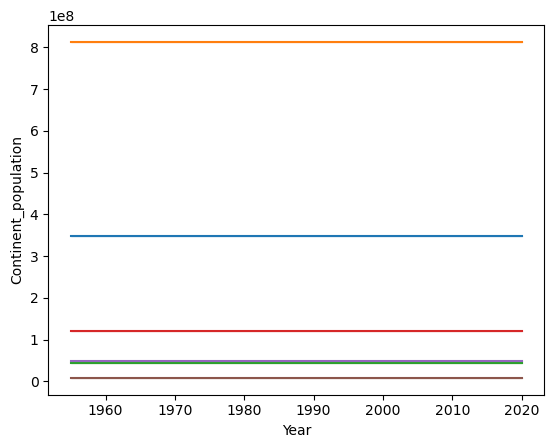

In [26]:
continent = ['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean', 'North America', 'Oceania']
i = 0
while i < len(continent):
    new_df = df_p[df_p['Continent'] == continent[i]]
    new_df['Continent_population'] = new_df['YearlyChange'].sum()
    df_p['Continent_population'] = new_df['Continent_population']
    sns.lineplot(x = 'Year', y = 'Continent_population', data = df_p)
    i = i + 1
#df_p
#new_df

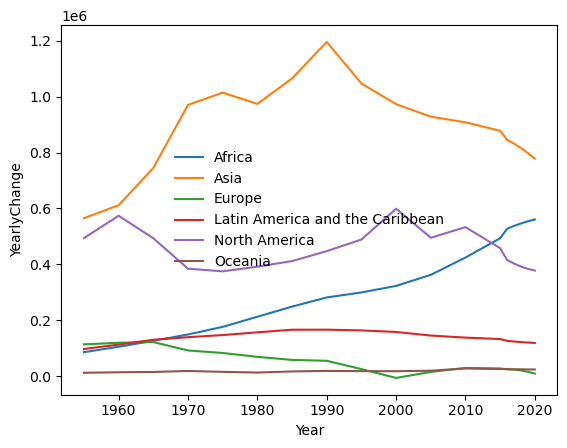

In [35]:
df_p.sort_values(by = 'Continent', inplace = True)
#df_p['Continent'].unique()
sns.lineplot(x = 'Year', y = 'YearlyChange', hue = 'Continent', data = df_p, ci = None, legend = True)
plt.legend(loc = 'center', frameon = False)
plt.show()

In [5]:
rd = df_p[df_p['Continent'] == 'Africa']
a = rd['YearlyChange'].sum()
a

349088322

In [70]:
game_df = pd.read_csv('game_consoles.csv')
game_df = game_df.drop(columns = ['Type', 'Release'])
game_df

,Console,Company,Units_sold
0,PlayStation 2,Sony,155000000
1,Nintendo DS,Nintendo,154002000
2,Nintendo Switch,Nintendo,122550000
3,Game Boy,Nintendo,118690000
4,PlayStation 4,Sony,117200000
5,PlayStation,Sony,102490000
6,Wii,Nintendo,101630000
7,PlayStation 3,Sony,87400000
8,Xbox 360,Microsoft,84000000
9,PlayStation Portable,Sony,82000000


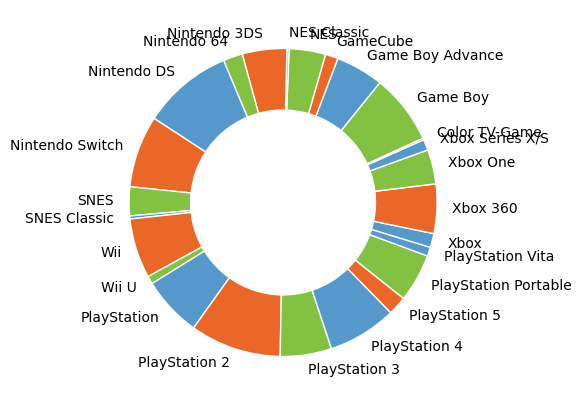

In [124]:
# Group the data by company and console type
group = game_df.groupby(['Company', 'Console'])

# Create a list of colors for the inner ring and outer ring
inner_colors = ['#156EAF', '#DB2018', '#56B45B']
outer_colors = ['#5599CC', '#EA6727', '#83C143']

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 5))

# Draw the inner ring
sizes = group['Units_sold'].sum()

ax.pie(sizes, labels=sizes.index.get_level_values(1), colors=outer_colors, startangle=343,
       wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw the outer ring for each company
start_angle = 90
#sizes2 = g2['Units_sold'].sum()
#ax.pie(sizes2, labels=sizes2.index.get_level_values(0), colors=inner_colors, startangle=343,
 #      wedgeprops=dict(width=0.4, edgecolor='w'))

In [97]:
group = game_df.groupby(by=['Company', 'Console'])
#group.first()

Units_sold
Company   Console                         
Microsoft Xbox                    24000000
          Xbox 360                84000000
          Xbox One                58500000
          Xbox Series X/S         18500000
Nintendo  Color TV-Game            3000000
          Game Boy               118690000
          Game Boy Advance        81510000
          GameCube                21740000
          NES                     61910000
          NES Classic              3560000
          Nintendo 3DS            75940000
          Nintendo 64             32930000
          Nintendo DS            154002000
          Nintendo Switch        122550000
          SNES                    49100000
          SNES Classic             5280000
          Wii                    101630000
          Wii U                   13560000
Sony      PlayStation            102490000
          PlayStation 2          155000000
          PlayStation 3           87400000
          PlayStation 4          117200000
          PlayStation 5           32100000
          PlayStation Portable    82000000
          PlayStation Vita        15000000

In [100]:
g = game_df[['Company', 'Console']].groupby(game_df['Units_sold']).sum()
g

,Company,Console
Units_sold,,
3000000,Nintendo,Color TV-Game
3560000,Nintendo,NES Classic
5280000,Nintendo,SNES Classic
13560000,Nintendo,Wii U
15000000,Sony,PlayStation Vita
18500000,Microsoft,Xbox Series X/S
21740000,Nintendo,GameCube
24000000,Microsoft,Xbox
32100000,Sony,PlayStation 5


In [113]:
game_df.sort_values(by = 'Company', inplace = True)

In [118]:
#game_df.reset_index()
#game_df = game_df.drop(columns=['index'])
game_df

,Console,Company,Units_sold
19,Xbox Series X/S,Microsoft,18500000
17,Xbox,Microsoft,24000000
8,Xbox 360,Microsoft,84000000
13,Xbox One,Microsoft,58500000
23,NES Classic,Nintendo,3560000
12,NES,Nintendo,61910000
22,SNES Classic,Nintendo,5280000
21,Wii U,Nintendo,13560000
18,GameCube,Nintendo,21740000
14,SNES,Nintendo,49100000


In [122]:
g2 = game_df.groupby(['Company'])
g2